In [1]:
using SymPy
using PyPlot

In [2]:
x,y,z = Sym("x"), Sym("y"), Sym("z");
E, ν = Sym("E"), Sym("nu")
ux, uy = Sym("u_x"), Sym("u_y")

(u_x,u_y)

In [3]:
f = simplify(E / ((1+ν) * (1-2ν)));
G = simplify(E / (2(1 + ν)))
λ = simplify(f * ν);
M = simplify(f * (1 - ν));

In [4]:
D = [M    λ     0;
     λ    M     0;
     0    0     G;]

3x3 Array{SymPy.Sym,2}
[     E*(nu - 1)             -E*nu                   ]
[-------------------  -------------------      0     ]
[(nu + 1)*(2*nu - 1)  (nu + 1)*(2*nu - 1)            ]
[                                                    ]
[       -E*nu              E*(nu - 1)                ]
[-------------------  -------------------      0     ]
[(nu + 1)*(2*nu - 1)  (nu + 1)*(2*nu - 1)            ]
[                                                    ]
[                                              E     ]
[         0                    0           ----------]
[                                          2*(nu + 1)]

In [5]:
ϵ = [Derivative(ux, x);
     Derivative(uy, y);
     1/2 * (Derivative(ux, y) + Derivative(uy, x))]

3-element Array{SymPy.Sym,1}
[         d               ]
[         --(u_x)         ]
[         dx              ]
[                         ]
[         d               ]
[         --(u_y)         ]
[         dy              ]
[                         ]
[    d             d      ]
[0.5*--(u_x) + 0.5*--(u_y)]
[    dy            dx     ]

In [6]:
σ = D * ϵ

3-element Array{SymPy.Sym,1}
[           d                        d      ]
[      E*nu*--(u_y)       E*(nu - 1)*--(u_x)]
[           dy                       dx     ]
[- ------------------- + -------------------]
[  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu - 1)]
[                                           ]
[           d                        d      ]
[      E*nu*--(u_x)       E*(nu - 1)*--(u_y)]
[           dx                       dy     ]
[- ------------------- + -------------------]
[  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu - 1)]
[                                           ]
[         /    d             d      \       ]
[       E*|0.5*--(u_x) + 0.5*--(u_y)|       ]
[         \    dy            dx     /       ]
[       -----------------------------       ]
[                 2*(nu + 1)                ]

$\mathbf{f}_i = \mathbf{\sigma}_{ij,j}$

In [7]:
f = σij_j = [Derivative(σ[1], x) + Derivative(σ[3], y);
             Derivative(σ[3], x) + Derivative(σ[2], y)]

2-element Array{SymPy.Sym,1}
[  /  /    d             d      \\     /           d                        d 
[  |E*|0.5*--(u_x) + 0.5*--(u_y)||     |      E*nu*--(u_y)       E*(nu - 1)*--
[d |  \    dy            dx     /|   d |           dy                       dx
[--|-----------------------------| + --|- ------------------- + --------------
[dy\          2*(nu + 1)         /   dx\  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu
[                                                                             
[  /  /    d             d      \\     /           d                        d 
[  |E*|0.5*--(u_x) + 0.5*--(u_y)||     |      E*nu*--(u_x)       E*(nu - 1)*--
[d |  \    dy            dx     /|   d |           dx                       dy
[--|-----------------------------| + --|- ------------------- + --------------
[dx\          2*(nu + 1)         /   dy\  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu

     \]
(u_x)|]
     |]
-----|]
 - 1)/]
      ]
     \]
(u_y)|]
     |]
-----|]
 - 1)/]

Give weird expressions to field and parameters

In [171]:
E0, u0, ν0, R = Sym("E_0"), Sym("u_0"), Sym("nu_0"), Sym("R");
ux_MMS = u0 * (1 + sin(x/R)^2*sin(2*y/R)^2)
uy_MMS = u0 * (1 + sin(x/R)^2*sin(2*y/R)^2)
#uy_MMS = u0 * (1 + sin(2*x/R)^2*cos(4*y/R)^2)
E_MMS = E0 #* (1 + sqrt(x^2 + 2y^2) / R)
ν_MMS = ν0 #* (1 + sqrt(3x^2 + 4y^2) / R)
display(ux_MMS)
display(uy_MMS)
display(E_MMS)
display(ν_MMS)

    /   2/x\    2/2*y\    \
u_0*|sin |-|*sin |---| + 1|
    \    \R/     \ R /    /

    /   2/x\    2/2*y\    \
u_0*|sin |-|*sin |---| + 1|
    \    \R/     \ R /    /

E_0

nu_0

Substitute the force with the expressions

In [172]:
f_MMS = map(simplify, subs(f, (E, E_MMS), (ν, ν_MMS), (ux, ux_MMS), (uy, uy_MMS)));

LoadError: LoadError: MethodError: `subs` has no method matching subs(::Array{Float64,1}, ::Tuple{SymPy.Sym,SymPy.Sym}, ::Tuple{SymPy.Sym,SymPy.Sym}, ::Tuple{SymPy.Sym,SymPy.Sym}, ::Tuple{SymPy.Sym,SymPy.Sym})
Closest candidates are:
  subs{T<:SymPy.SymbolicObject}(!Matched::T<:SymPy.SymbolicObject, ::Tuple{Union{AbstractString,SymPy.SymbolicObject,Symbol},Any}, ::Any...)
  subs(!Matched::Array{SymPy.Sym,N}, ::Any...)
  subs{T<:SymPy.SymbolicObject}(!Matched::T<:SymPy.SymbolicObject, ::Tuple{Union{AbstractString,SymPy.SymbolicObject,Symbol},Any})
  ...
while loading In[172], in expression starting on line 1

### Perform the derivatives!

In [173]:
f_MMS_done = [doit(f_MMS[1]); doit(f_MMS[2])]

2-element Array{SymPy.Sym,1}
[         /           2/x\    2/2*y\            2/x\    2/2*y\             /2*
[         |  8*u_0*sin |-|*sin |---|   8*u_0*sin |-|*cos |---|   32*u_0*sin|--
[         |            \R/     \ R /             \R/     \ R /             \ R
[0.25*E_0*|- ----------------------- + ----------------------- - -------------
[         |              2                         2                          
[         \             R                         R                           
[-----------------------------------------------------------------------------
[                                                  nu_0 + 1                   
[                                                                             
[         /         /x\    /2*y\    /x\    /2*y\            2/2*x\    2/4*y\  
[         |8*u_0*sin|-|*sin|---|*cos|-|*cos|---|   8*u_0*sin |---|*cos |---|  
[         |         \R/    \ R /    \R/    \ R /             \ R /     \ R /  
[0.25*E_0*|------------

### Insert the constants

In [246]:
E00 = 10
nu00 = 0.3
RR = 0.5
u00 = 4.0
f_p = [subs(f_MMS_done[1], (E0, E00), (ν0, nu00), (R, RR), (u0, u00));
     subs(f_MMS_done[2], (E0, E00), (ν0, nu00), (R, RR), (u0, u00))]

2-element Array{SymPy.Sym,1}
[                            2           2                              2     
[- -676.923076923077*(-1)*sin (2.0*x)*sin (4.0*y) + 246.153846153846*sin (2.0*
[                                                                             
[                                                                             
[    984.615384615385*sin(2.0*x)*sin(4.0*y)*cos(2.0*x)*cos(4.0*y) + 6892.30769

      2                                                                       
x)*cos (4.0*y) - -3938.46153846154*(-1)*sin(4.0*x)*sin(8.0*y)*cos(4.0*x)*cos(8
                                                                              
          2           2                                    2           2      
230769*sin (4.0*x)*sin (8.0*y) - -7138.46153846154*(-1)*sin (4.0*x)*cos (8.0*y

                            2           2       ]
.0*y) + 430.769230769231*sin (4.0*y)*cos (2.0*x)]
                                                ]
                        2    

In [247]:
function computee(f_p, xx, yy)
    return subs(f_p[1], (x, xx), (y, yy)), 
           subs(f_p[2], (x, xx), (y, yy))
end

computee (generic function with 1 method)

In [248]:
n = 30
p1 = [-0.2,-0.2]
p2 = [0.2,0.2]
xsp = linspace(p1[1],p2[1],n)
ysp = linspace(p1[2],p2[2],n)
Z1 = zeros(n,n)
Z2 = zeros(n,n)
for (i, xx) in enumerate(xsp), (j, yy) in enumerate(ysp)
    Z = computee(f_p, xx, yy)
    Z1[i,j] = Z[1]
    Z2[i,j] = Z[2]
end
mag = sqrt(Z1.^2 + Z2.^2);

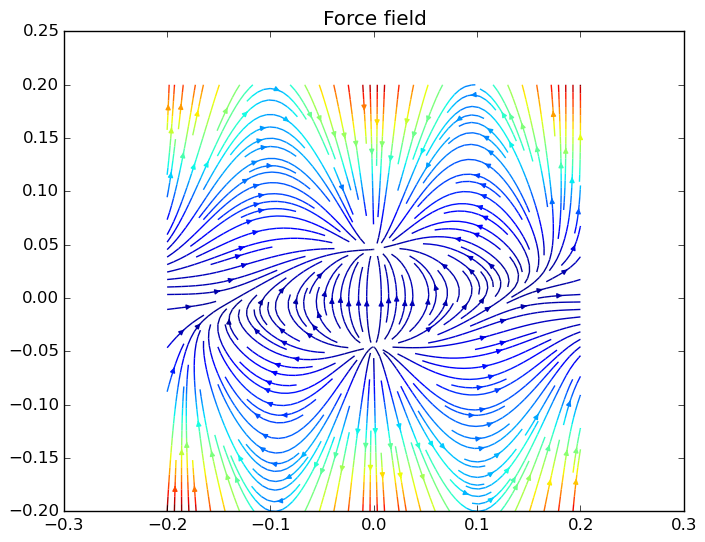

PyObject <matplotlib.text.Text object at 0x7f7af6581290>

In [249]:
streamplot(collect(xsp), collect(ysp), Z1, Z2, 2, color=mag)
title("Force field")

In [250]:
XX = [x for x in xsp, y in ysp]
YY = [y for x in xsp, y in ysp];

In [195]:
#contour(XX, YY, Z1);

In [196]:
#contour(XX, YY, Z2)

In [234]:
using JuAFEM

In [235]:
Edof, Ex, Ey, 
B1, B2, B3, B4, coords = JuAFEM.gen_quad_mesh(p1, p2, 20, 20, 2);

In [236]:
#eldraw2(Ex, Ey, [1,2,1], 1:4)

In [253]:
bc_dofs = union(B1[:], B2[:], B3[:], B4[:])
bc = zeros(length(bc_dofs), 2)
for i in 1:size(bc, 1)
    dof = bc_dofs[i]
    bc[i, 1] = dof
    node = div(dof+1, 2)
    coord_x = coords[node, 1]
    coord_y = coords[node, 2]
    x_dof = mod(dof,2) != 0
    if x_dof
        bc[i, 2] = N(subs(ux_MMS, (x, coord_x), (y,coord_y), (u0, u00), (R, RR)))
    else
        bc[i, 2] = N(subs(uy_MMS, (x, coord_x), (y,coord_y), (u0, u00), (R, RR)))
    end
end


In [254]:
a = start_assemble()
D = hooke(2, 250e9, 0.3)
f = zeros(length(coords))
for e in 1:size(Edof, 1)
    ex = Ex[Edof[e,1], :]'
    ey = Ey[Edof[e,1], :]'
    
    center = [sum(ex, 1)/4 sum(ey, 1)/4]
    eq_sym = computee(f_p, center[1], center[2]) 

    Ke, fe = plani4e(ex, ey, [2, 1, 2], D, [eq_sym[1], eq_sym[2]])
    f[Edof[e,2:end]] += reshape(fe, (1,8))
    assemble(Edof[e, :], a, Ke)
end
K = end_assemble(a);
a, _ = solve_eq_sys(K, f, bc);

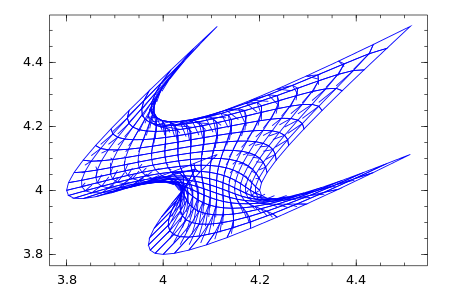

In [255]:
Ed2 = extract_eldisp(Edof, a);
JuAFEM.eldisp2(Ex, Ey, Ed2, [1,2,2])

In [251]:
u_xs = zeros(size(coords,1))
u_ys = zeros(size(coords,1))
a = zeros(length(coords))
for c in 1:size(coords,1)
    coord_x = coords[c,1]
    coord_y = coords[c,2]
    a[c*2-1] = N(subs(ux_MMS, (x, coord_x), (y,coord_y), (u0, u00), (R, RR)))
    a[c*2] = N(subs(uy_MMS, (x, coord_x), (y,coord_y), (u0, u00), (R, RR)))
end

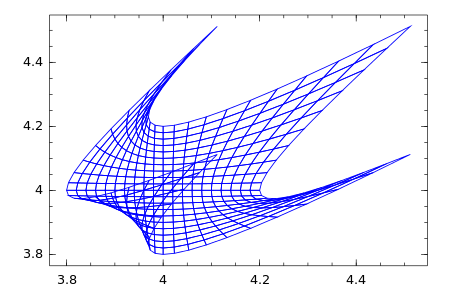

In [252]:
Ed = extract_eldisp(Edof, a);
eldisp2(Ex, Ey, Ed, [1,2,2])